<a href="https://colab.research.google.com/github/sohil344/Pandas_task/blob/main/Outlier_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

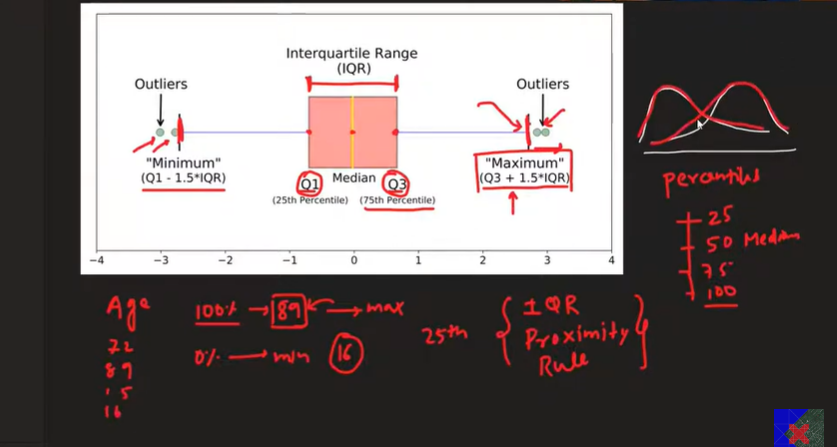

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv"

df=pd.read_csv(url)

In [4]:
df.sample(8)

,cgpa,placement_exam_marks,placed
430,7.22,19.0,1
705,6.55,35.0,1
812,5.99,23.0,0
177,6.22,40.0,1
414,7.30,36.0,1
247,6.25,49.0,0
463,6.82,49.0,1
153,6.29,10.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

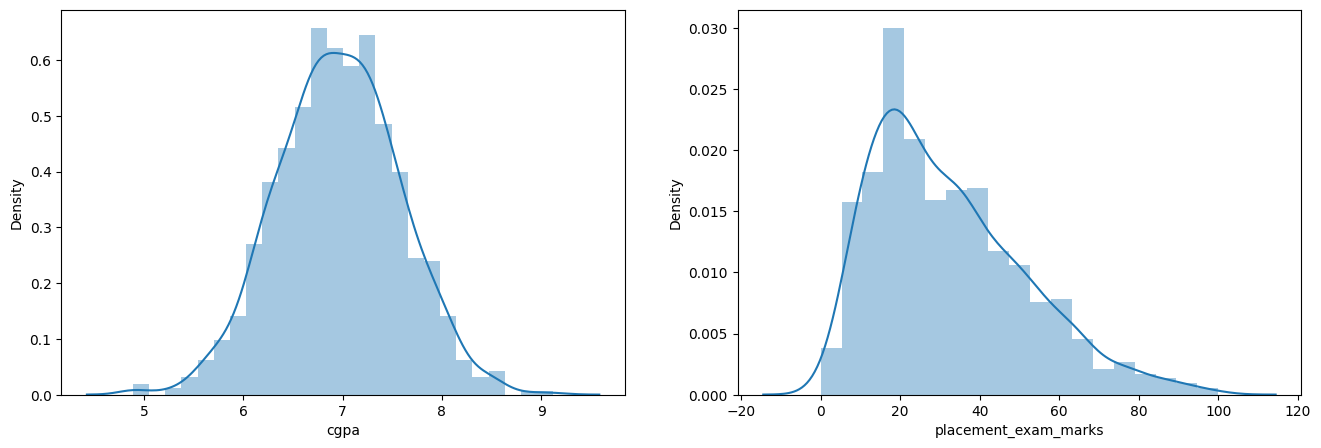

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
#CGPA col is having normal distributed data

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
#Placement_marks data is normally distributed, data shows exam was tough since high no of students have poor marks

In [7]:
print("Mean value of CGPA",df['cgpa'].mean())
print("Std  value of CGPA",df['cgpa'].std())
print("Min value of CGPA",df['cgpa'].min())
print("Max value of CGPA",df['cgpa'].max())

Mean value of CGPA 6.96124
Std  value of CGPA 0.6158978751323896
Min value of CGPA 4.89
Max value of CGPA 9.12


In [9]:
df['placement_exam_marks'].skew() #shows it is extermly skewed

0.8356419499466834

In [10]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: >

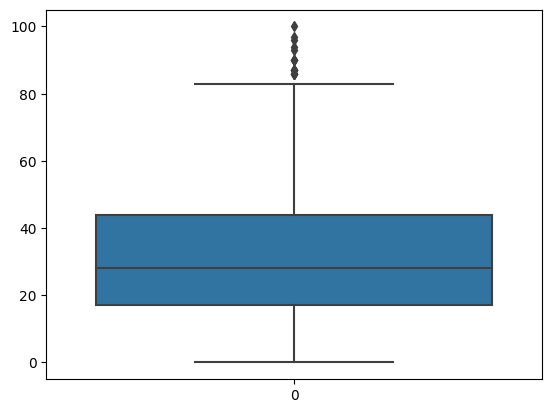

In [11]:
sns.boxplot(df['placement_exam_marks'])

In [12]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [13]:
percentile25


17.0

In [14]:
IQR=percentile75-percentile25

In [15]:
max_limit=percentile75+1.5*IQR

In [16]:
min_limit=percentile25-1.5*IQR

**Finding Outliers**

In [18]:
df[df['placement_exam_marks']>max_limit]


,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


**Trimming**

In [19]:
new_df=df[df['placement_exam_marks']<max_limit]

In [20]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

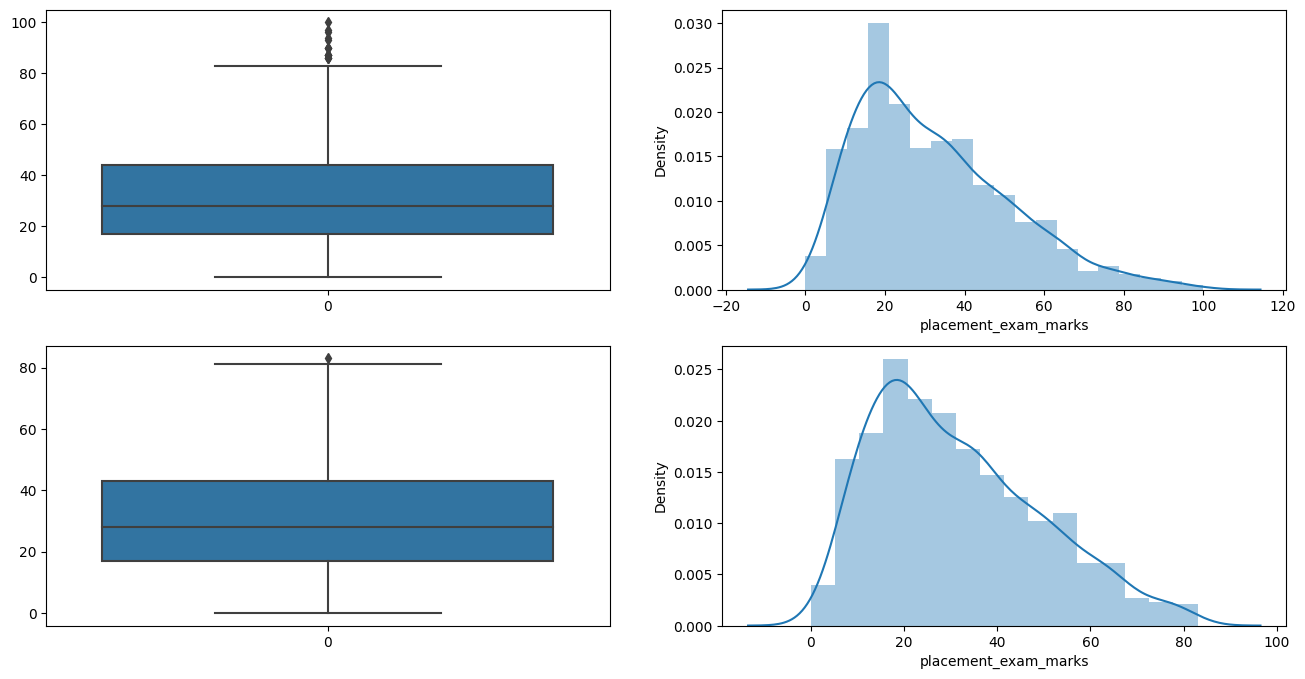

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.distplot(new_df['placement_exam_marks'])


In [22]:
new_df_1=df.copy()

In [23]:
new_df_1['placement_exam_marks']=np.where(
    new_df_1['placement_exam_marks']>max_limit,max_limit,
    np.where(new_df_1['placement_exam_marks']<min_limit,min_limit,new_df_1['placement_exam_marks']
             )
)

In [24]:
new_df_1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
